## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.model_selection import cross_validate, cross_val_score
 
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.feature_selection import RFE

## Загрузка датасета

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv", index_col='ID')
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29999,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
30000,50000.0,1,2,1,46,0,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


## Статистика и информация по датасету

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [4]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


##  Проверка датасета на наличие значений, не указанных в описании
### Есть не указанные в описании значения "0" для EDUCATION, MARRIAGE, PAY_Х

In [5]:
for col in df.iloc[:,:-1].columns:
    print(col, df[col].unique())

LIMIT_BAL [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX [2 1]
EDUCATION [2 1 3 5 4 6 0]
MARRIAGE [1 2 3 0]
AGE [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0 [ 2 -1  0 -2

In [6]:
df['MARRIAGE'][df['MARRIAGE']==0].count()

54

In [7]:
df['EDUCATION'][df['EDUCATION']==0].count()

14

### Будем расценивать "0" как неизвестно в указанных колонках.
### Для EDUCATION заменим 5 и 6 на 0, так как они обозначают то же. Это потребуется для дальнейшего вменения данных.

In [8]:
df['EDUCATION'] = np.where((df['EDUCATION']==6)| (df['EDUCATION']==5), 0, df['EDUCATION'])

In [9]:
df['EDUCATION'].unique()

array([2, 1, 3, 0, 4], dtype=int64)

## Подготовка данных для обучения

In [10]:
# Делим выборку на Х и у, где у - целевая переменная
X = df.drop('default', axis = 1)
y = df['default']

### Cплит данных в соответствии с заданным условием

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2) 

### Подготовка данных к предобработке

In [12]:
# Категориальные переменные, представленные числами
dum_imp = ['EDUCATION', 'MARRIAGE', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
# Количественные переменные
num_features = ['LIMIT_BAL', 'AGE', 
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
               'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

### Преобразование данных: вменение неизвестных значений, перемасштабирование количественных переменных

In [13]:
imp_transformer = Pipeline(steps=[
    ('imp', IterativeImputer(missing_values=0, max_iter=10, add_indicator=False))
])

   
CT = ColumnTransformer([
        ("dum_imp", imp_transformer, dum_imp),
        ("num", StandardScaler(), num_features)#,
#        ("encoder", OneHotEncoder(), dum_onehot)
         ], remainder='passthrough')

display(CT)

X_train_ct = CT.fit_transform(X_train)
pd.DataFrame(X_train_ct).head()

ColumnTransformer(remainder='passthrough',
                  transformers=[('dum_imp',
                                 Pipeline(steps=[('imp',
                                                  IterativeImputer(missing_values=0))]),
                                 ['EDUCATION', 'MARRIAGE', 'SEX', 'PAY_0',
                                  'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6']),
                                ('num', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6'])])

C:\Users\a7610\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,2.0,2.0,-0.086543,-0.266454,-0.245047,-0.325635,-0.386732,-0.373747,0.098438,...,0.051749,0.100659,0.064439,-0.102319,-0.157282,0.167920,-0.177583,-0.239897,-0.158277,0.990809
1,2.0,2.0,1.0,0.185401,0.070155,0.036041,-0.070715,-0.163724,-0.222124,1.943810,...,3.487496,3.896448,4.370800,4.607087,0.506330,0.187874,0.326623,0.706464,0.480133,0.600337
2,1.0,1.0,1.0,-0.067679,-0.217179,-0.253417,-0.335538,-0.404331,-0.406465,-0.670467,...,0.040798,-0.070648,-0.087179,-0.645403,-0.186832,-0.183616,-0.206661,-0.203377,-0.293043,-0.289249
3,1.0,1.0,1.0,-1.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,1.866919,...,-0.386054,-0.528971,-0.486130,-0.490689,0.759532,0.123590,-0.290471,0.358387,0.305128,0.251564
4,2.0,1.0,2.0,-0.017612,-0.152119,-0.167271,-0.234267,-0.298753,-0.307176,-0.439796,...,-0.298112,-0.311430,-0.276282,-0.406090,-0.157634,-0.163290,-0.122458,0.074630,-0.157089,-0.283078


## Решетчатый поиск оптимальных гиперпараметров на модели дерева решений

### Осуществлялся подбор максимальной глубины дерева (max_depth), функция оценки качества сплитования в узлах (criterion), количество фич в модели (max_features). Попытка подбора минимального количества образцов в листе (min_samples_leaf) вплоть до 17 не улучшала метрики, поэтому не используется.
### Метрика выбрана с соответствии с заданием - ROC AUC.

In [14]:
dtc = DecisionTreeClassifier()
cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5)
# min_samples_leaf = np.arange(1,18,2)
max_depth = np.arange(4,20)
param_grid = { 
    'max_features': ['sqrt', 'log2', None], #None, 
#    'min_samples_leaf' : [4,6,8,10,12,14], #None,3,
    'criterion' :['gini', 'entropy'],
    'class_weight': ['balanced', None],
    'max_depth': max_depth
}

grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=cv, return_train_score = True, scoring = 'roc_auc')
grid.fit(X_train_ct, y_train)
grid

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'max_features': ['sqrt', 'log2', None]},
             return_train_score=True, scoring='roc_auc')

In [15]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,53,5,50,101,2,149,56,152,104,146,...,142,132,135,47,139,134,137,140,141,143
mean_fit_time,0.200869,0.136375,0.164689,0.097912,0.104828,0.135804,0.212172,0.205533,0.144681,0.109254,...,0.058037,0.064657,0.056937,0.459418,0.049741,0.281926,0.298633,0.294267,0.060414,0.29642
std_fit_time,0.018495,0.008558,0.008587,0.00646,0.006454,0.008051,0.011413,0.017775,0.012917,0.007685,...,0.001019,0.017296,0.002877,0.02757,0.004751,0.024189,0.018909,0.009186,0.002848,0.003895
mean_score_time,0.0024,0.005669,0.002951,0.000601,0.005274,0.003141,0.005427,0.003801,0.003587,0.004911,...,0.004201,0.003229,0.004002,0.005003,0.0108,0.005502,0.003001,0.004128,0.00514,0.00381
std_score_time,0.002245,0.006113,0.001521,0.001202,0.006643,0.006283,0.005315,0.002228,0.00631,0.004791,...,0.0004,0.002826,0.000001,0.001098,0.007333,0.005239,0.00155,0.006074,0.001818,0.000381
param_class_weight,balanced,balanced,balanced,None,balanced,None,balanced,None,None,None,...,None,None,None,balanced,None,None,None,None,None,None
param_criterion,entropy,gini,entropy,gini,gini,entropy,entropy,entropy,gini,entropy,...,gini,gini,gini,gini,gini,gini,gini,gini,gini,gini
param_max_depth,5,5,4,5,4,5,6,6,6,4,...,19,16,17,19,18,16,17,18,19,19
param_max_features,None,None,None,None,None,None,None,None,None,None,...,log2,sqrt,sqrt,None,log2,None,None,None,sqrt,None
params,"{'class_weight': 'balanced', 'criterion': 'ent...","{'class_weight': 'balanced', 'criterion': 'gin...","{'class_weight': 'balanced', 'criterion': 'ent...","{'class_weight': None, 'criterion': 'gini', 'm...","{'class_weight': 'balanced', 'criterion': 'gin...","{'class_weight': None, 'criterion': 'entropy',...","{'class_weight': 'balanced', 'criterion': 'ent...","{'class_weight': None, 'criterion': 'entropy',...","{'class_weight': None, 'criterion': 'gini', 'm...","{'class_weight': None, 'criterion': 'entropy',...",...,"{'class_weight': None, 'criterion': 'gini', 'm...","{'class_weight': None, 'criterion': 'gini', 'm...","{'class_weight': None, 'criterion': 'gini', 'm...","{'class_weight': 'balanced', 'criterion': 'gin...","{'class_weight': None, 'criterion': 'gini', 'm...","{'class_weight': None, 'criterion': 'gini', 'm...","{'class_weight': None, 'criterion': 'gini', 'm...","{'class_weight': None, 'criterion': 'gini', 'm...","{'class_weight': None, 'criterion': 'gini', 'm...","{'class_weight': None, 'criterion': 'gini', 'm..."
split0_test_score,0.754307,0.755518,0.75789,0.758105,0.75457,0.758124,0.753726,0.75475,0.752011,0.753906,...,0.615554,0.612859,0.615913,0.604223,0.617364,0.608306,0.59021,0.590127,0.599582,0.586328


### Лучшие параметры

In [16]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None}

### Лучший результат

In [17]:
grid.best_score_

0.7599861105373283

## Сравнение с тестовой выборкой

In [18]:
pipe_final = Pipeline(steps=[('preprocessing', CT),
                ('classifier', DecisionTreeClassifier(max_features=None, max_depth=5,
                                                      criterion='entropy', class_weight='balanced'))]) 
pipe_final.fit(X_train, y_train)

C:\Users\a7610\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dum_imp',
                                                  Pipeline(steps=[('imp',
                                                                   IterativeImputer(missing_values=0))]),
                                                  ['EDUCATION', 'MARRIAGE',
                                                   'SEX', 'PAY_0', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6']),
                                                 ('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=5))])

In [19]:
y_predict = pipe_final.predict(X_test)
print('ROC AUC на тестовой выборке: ', roc_auc_score(y_test, y_predict))

ROC AUC на тестовой выборке:  0.708533574280959


#### ROC AUC на тестовой выборке немного меньше, чем на тренировочной. Отмечается небольшое переобучение модели.

## Определение важности признаков

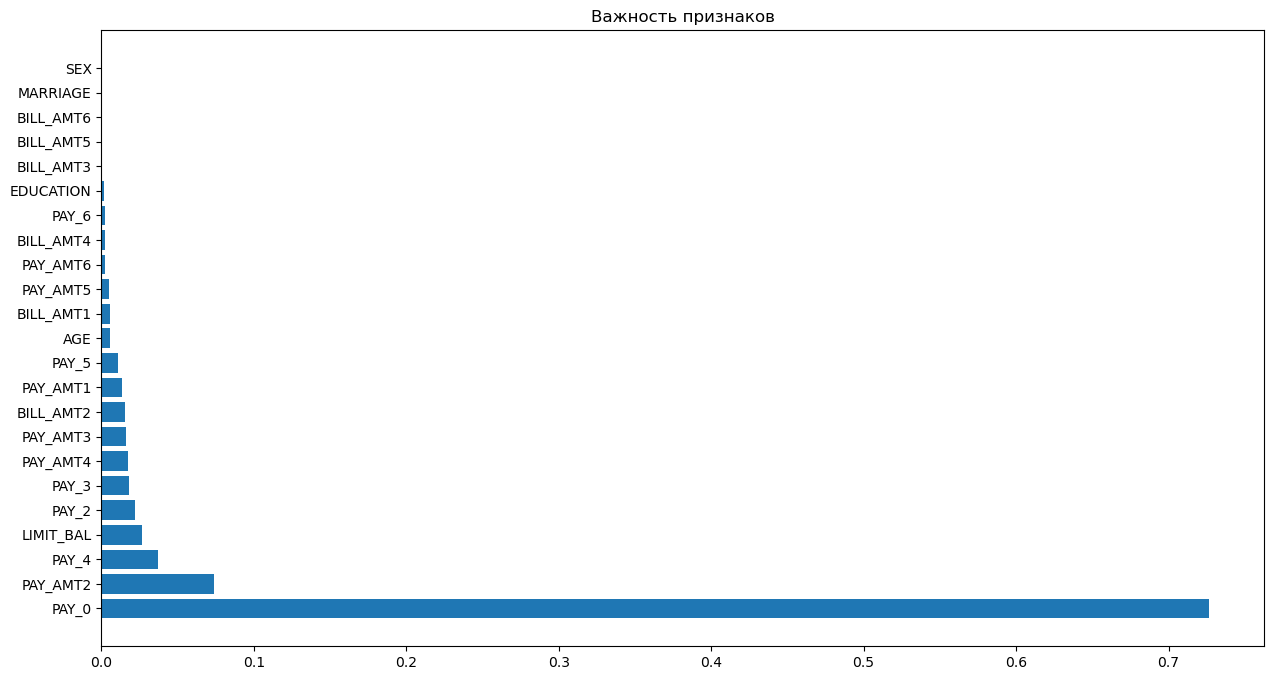

In [20]:
dtc = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_features=None, max_depth=5)
dtc.fit(X_train, y_train)

plt.figure(figsize=(15,8))
feature_names = np.array(df.columns)
#importance = rfc.feature_importances_

importance = np.sort(dtc.feature_importances_)
importance_name = np.argsort(dtc.feature_importances_)

plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

#### В модели наиболее важным признаком является статус своевременного первого платежа, далее - суммы второго платежа. Потом идет группа признаков, также отвечающих за своевременность платежей, их сумму и количество денег на счете. Социо-демографические характеристики не играют значительной роли в данной модели. 
#### Однако это не означает, что при на самом деле распределение значимости факторов будет таким же. Целью модели машинного обучения является наиболее точное предсказание результата, но не воздействующих факторов. При изменении параметров можно увидеть обратную ситуацию. Для анализа степени воздействия отдельных факторов существуют эконометрические модели.

## Визуализация дерева решений

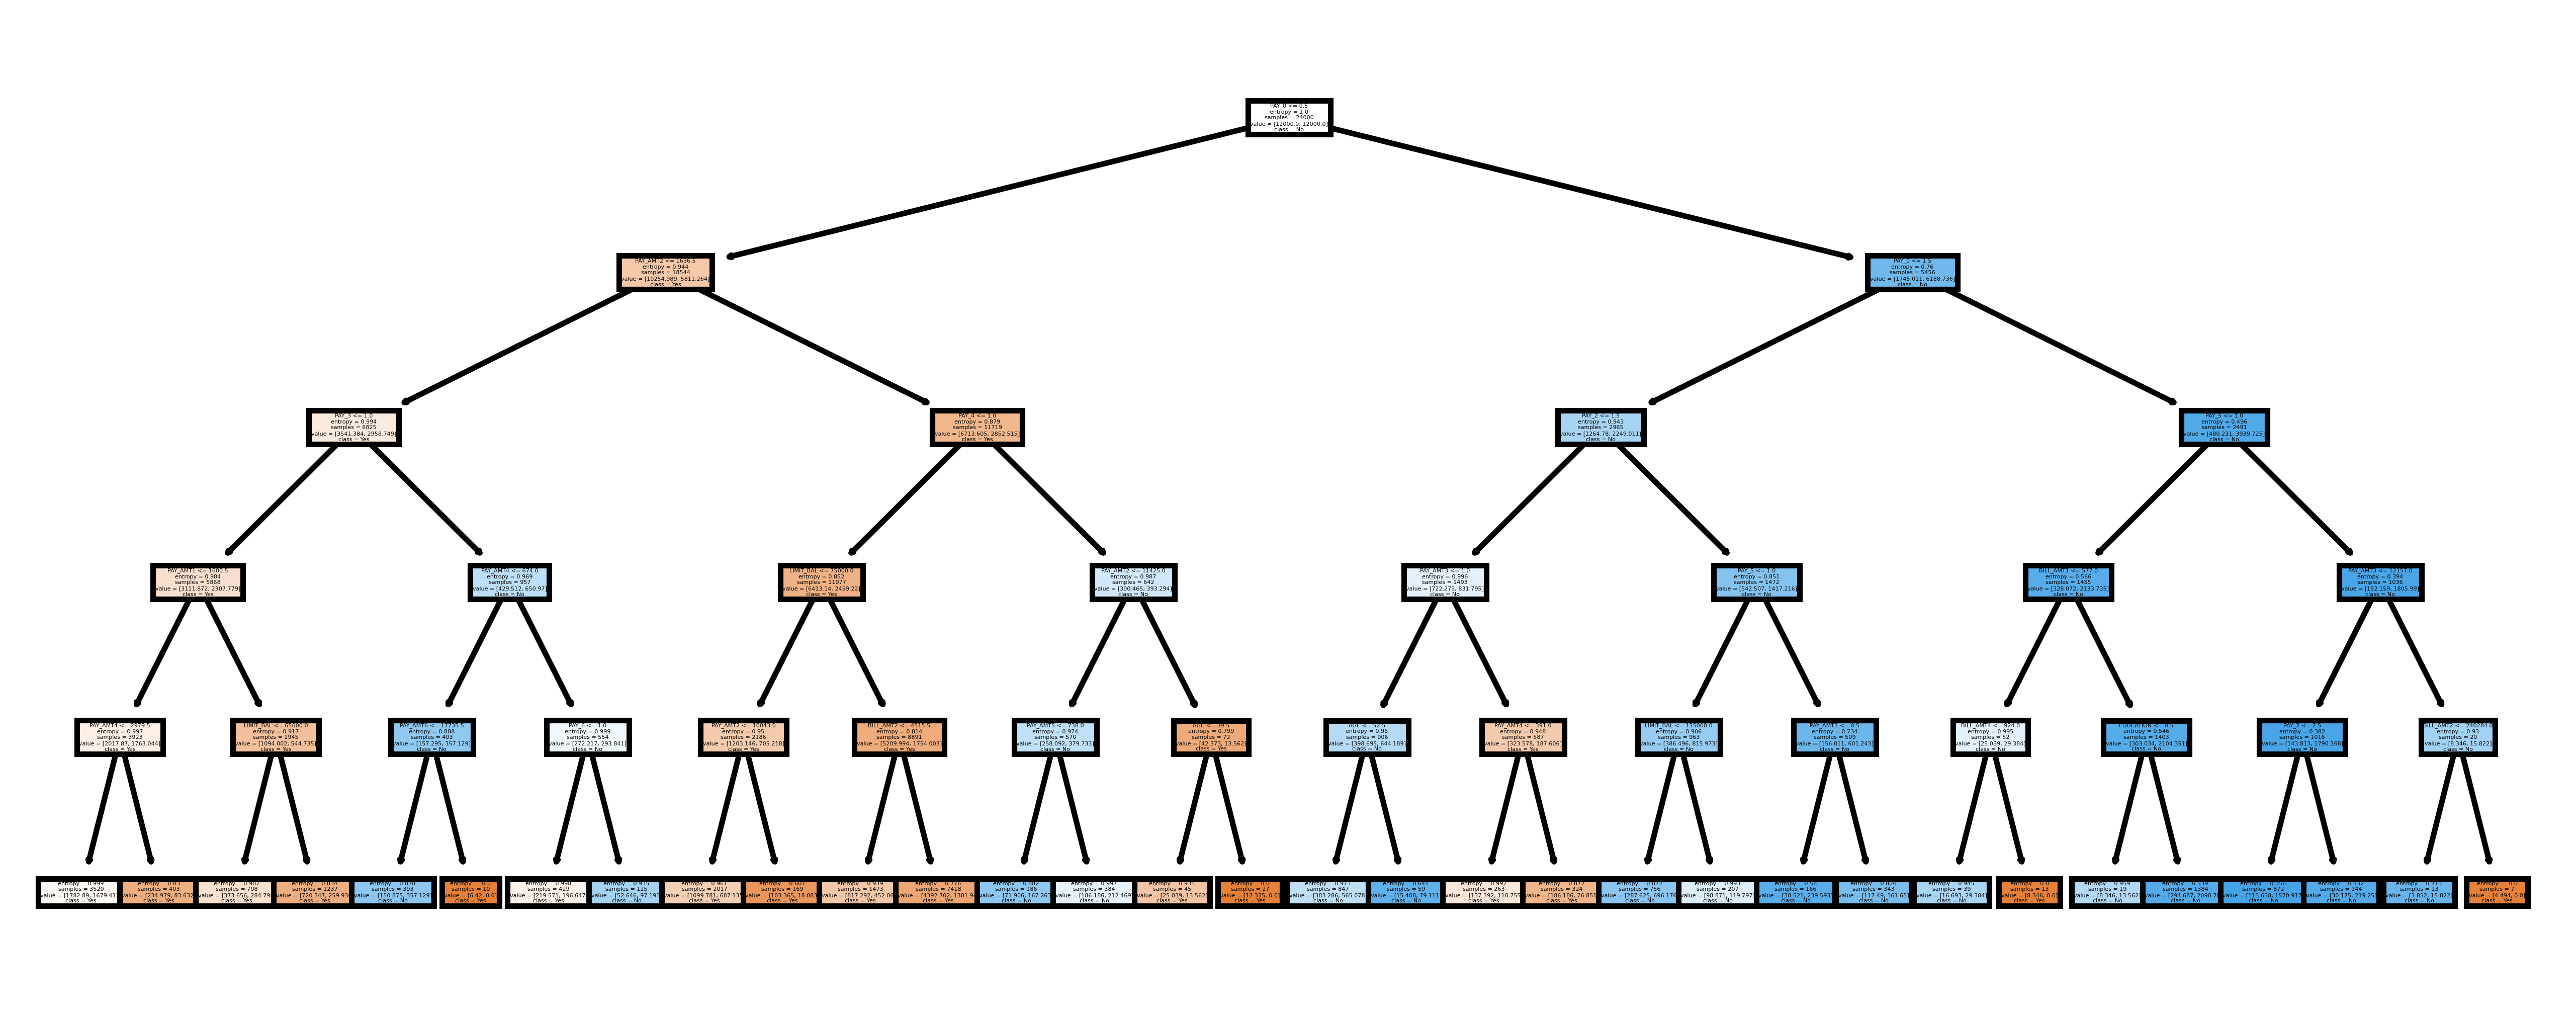

In [21]:
fn=X.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,3), dpi=800)
plot_tree(dtc,
               feature_names = fn, 
               class_names=['Yes','No'],
               filled = True);